In [1]:

import os
import cv2
import tensorflow as tf
import numpy as np


In [2]:


Dataset ="E:\MasknoMask\dataset"
categories=os.listdir(Dataset)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [3]:

data_path="E:\MasknoMask\dataset"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [5]:
img_size=224
data=[]
label=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.0) ..\modules\imgproc\src\

In [6]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

In [7]:


tlabel = tf.keras.utils.to_categorical(label)
# # vlabel = tf.keras.utils.to_categorical(vlabel,num_classes=10)
tlabel.shape

(3810, 2)

In [8]:
in_sh=data.shape[1:]
print(in_sh)

(224, 224, 1)


In [9]:
model=tf.keras.models.Sequential([

        
        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=in_sh),
        tf.keras.layers.MaxPooling2D(2,2),
    
         tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
#     
    
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2,activation='softmax')
    
        
    
    
    
])

In [10]:
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [11]:
training_data=ImageDataGenerator(
  
    rotation_range=20, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08
    ,validation_split=0.25
    )



In [12]:
training_data.fit(data)

In [13]:
train=training_data.flow(data,tlabel,batch_size=64)


In [14]:
lr=1e-4


opt=tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [15]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,tlabel,test_size=0.1)

In [16]:
history=model.fit(train_data,train_target, epochs=20 ,validation_data=(test_data,test_target),batch_size=32)
#                   batch_size=64,
#                   steps_per_epoch=data[0]//64,

                  
#                   validation_split=0.2
                  

Train on 3429 samples, validate on 381 samples
Epoch 1/20
3429/3429 [==============================] - 89s 26ms/sample - loss: 0.6304 - accuracy: 0.6337 - val_loss: 0.4572 - val_accuracy: 0.7953
Epoch 2/20
3429/3429 [==============================] - 62s 18ms/sample - loss: 0.4407 - accuracy: 0.8008 - val_loss: 0.3109 - val_accuracy: 0.8793
Epoch 3/20
3429/3429 [==============================] - 63s 18ms/sample - loss: 0.3361 - accuracy: 0.8586 - val_loss: 0.2280 - val_accuracy: 0.9081
Epoch 4/20
3429/3429 [==============================] - 62s 18ms/sample - loss: 0.2622 - accuracy: 0.8924 - val_loss: 0.1743 - val_accuracy: 0.9396
Epoch 5/20
3429/3429 [==============================] - 62s 18ms/sample - loss: 0.2106 - accuracy: 0.9166 - val_loss: 0.1531 - val_accuracy: 0.9370
Epoch 6/20
3429/3429 [==============================] - 62s 18ms/sample - loss: 0.1758 - accuracy: 0.9303 - val_loss: 0.1468 - val_accuracy: 0.9344
Epoch 7/20
3429/3429 [==============================] - 62s 18ms/

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mapimg
matplotlib.__version__

'3.3.2'

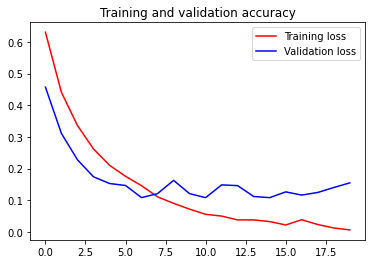

<Figure size 432x288 with 0 Axes>

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


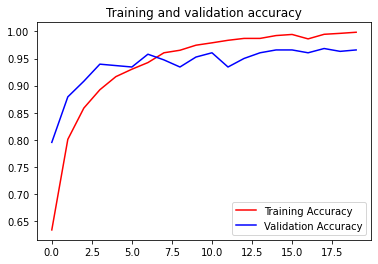

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [20]:
model.save("maskdetectionlabel.model",save_format='h5')

In [30]:
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={1:'MASK',0:'NO MASK'}
color_dict={1:(0,255,0),0:(0,0,255)}

In [31]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(224,224))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,224,224,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [27]:
source.release()